## Caricamento delle Librerie e dei Dati

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import plot
from sklearn.cluster import KMeans

In [2]:
df_NonNormalizzato = pd.read_csv("TabelloneNonNormalizzato.csv")
df = pd.read_csv("TabelloneNormalizzato.csv")

## Esempio di Segmentazione

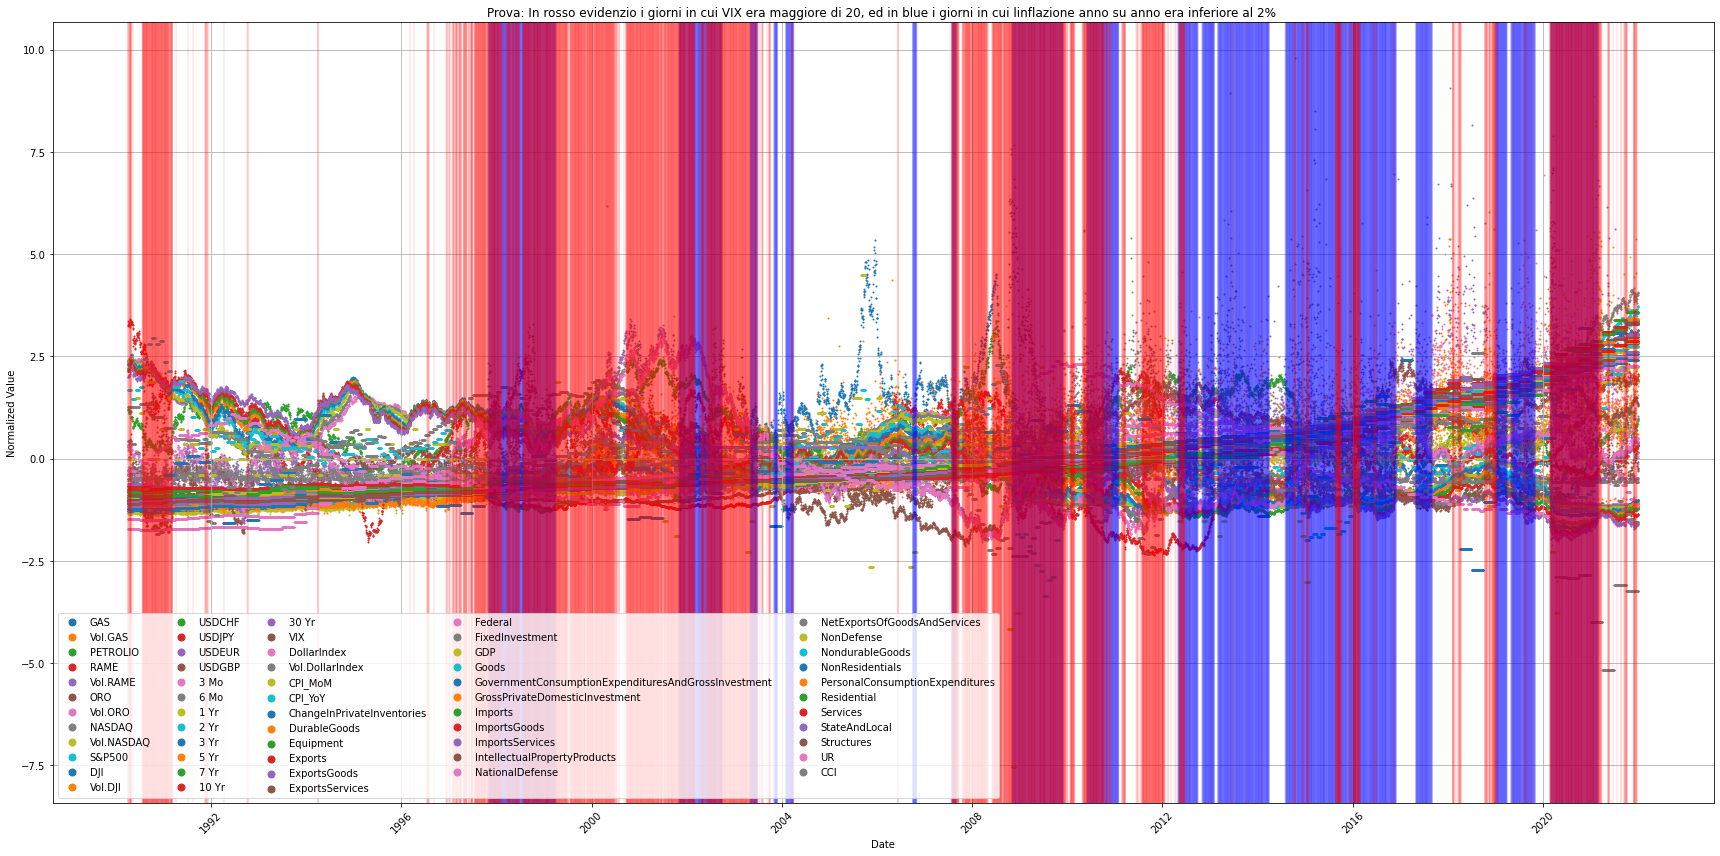

In [3]:
# Creiamo un grafico vuoto

df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')

plt.figure(figsize=(24, 12))

# Iteriamo sulle colonne del DataFrame normalizzato
for col in df.columns:
    if(col != 'Date'):  # Escludiamo la colonna 'Date'
        plt.scatter(df['Date'], df[col], label=col, s=1)

highlight_dates = df_NonNormalizzato[df_NonNormalizzato['CPI_YoY'] < 2]['Date']
highlight_dates = pd.to_datetime(highlight_dates, format='%Y/%m/%d')
for date in highlight_dates:
    plt.axvline(date, color='blue', alpha=0.1)
    
highlight_dates2 = df_NonNormalizzato[df_NonNormalizzato['VIX'] > 20]['Date']
highlight_dates2 = pd.to_datetime(highlight_dates2, format='%Y/%m/%d')
for date in highlight_dates2:
    plt.axvline(date, color='red', alpha=0.1)
        
# Aggiungiamo etichette e titolo
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('Prova: In rosso evidenzio i giorni in cui VIX era maggiore di 20, ed in blue i giorni in cui linflazione anno su anno era inferiore al 2% ')

# Aggiungiamo la legenda
plt.legend(loc='lower left', fontsize=10., markerscale=7, ncol=5)

# Ruotiamo le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Mostriamo il grafico
plt.tight_layout()
plt.grid(True) 

plt.show()

## Primo Tentativo di Clustering (con Tutte le Serie Temporali Non Normalizzate)

In [4]:
#DECIDO QUALI SERIE TEMPORALI TENERE PER FARE IL CLUSTERING
#IN QUESTO CASO LE PRENDO TUTTE, E IL DATASET E' QUELLO NON NORMALIZZATO
X = df_NonNormalizzato.drop('Date', axis=1)

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\andre\AppData\Roaming\Python\Py

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



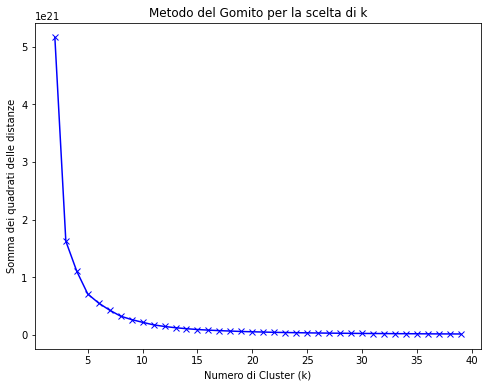

In [5]:
X = df_NonNormalizzato.drop('Date', axis=1)
#METODO DEL GOMITO
sum_of_squared_distances = []
K = range(2, 40)
for k in K:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X)
    sum_of_squared_distances.append(kmeans.inertia_)
    
# Plot del grafico "gomito"
plt.figure(figsize=(8, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('Somma dei quadrati delle distanze')
plt.title('Metodo del Gomito per la scelta di k')
plt.show()

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



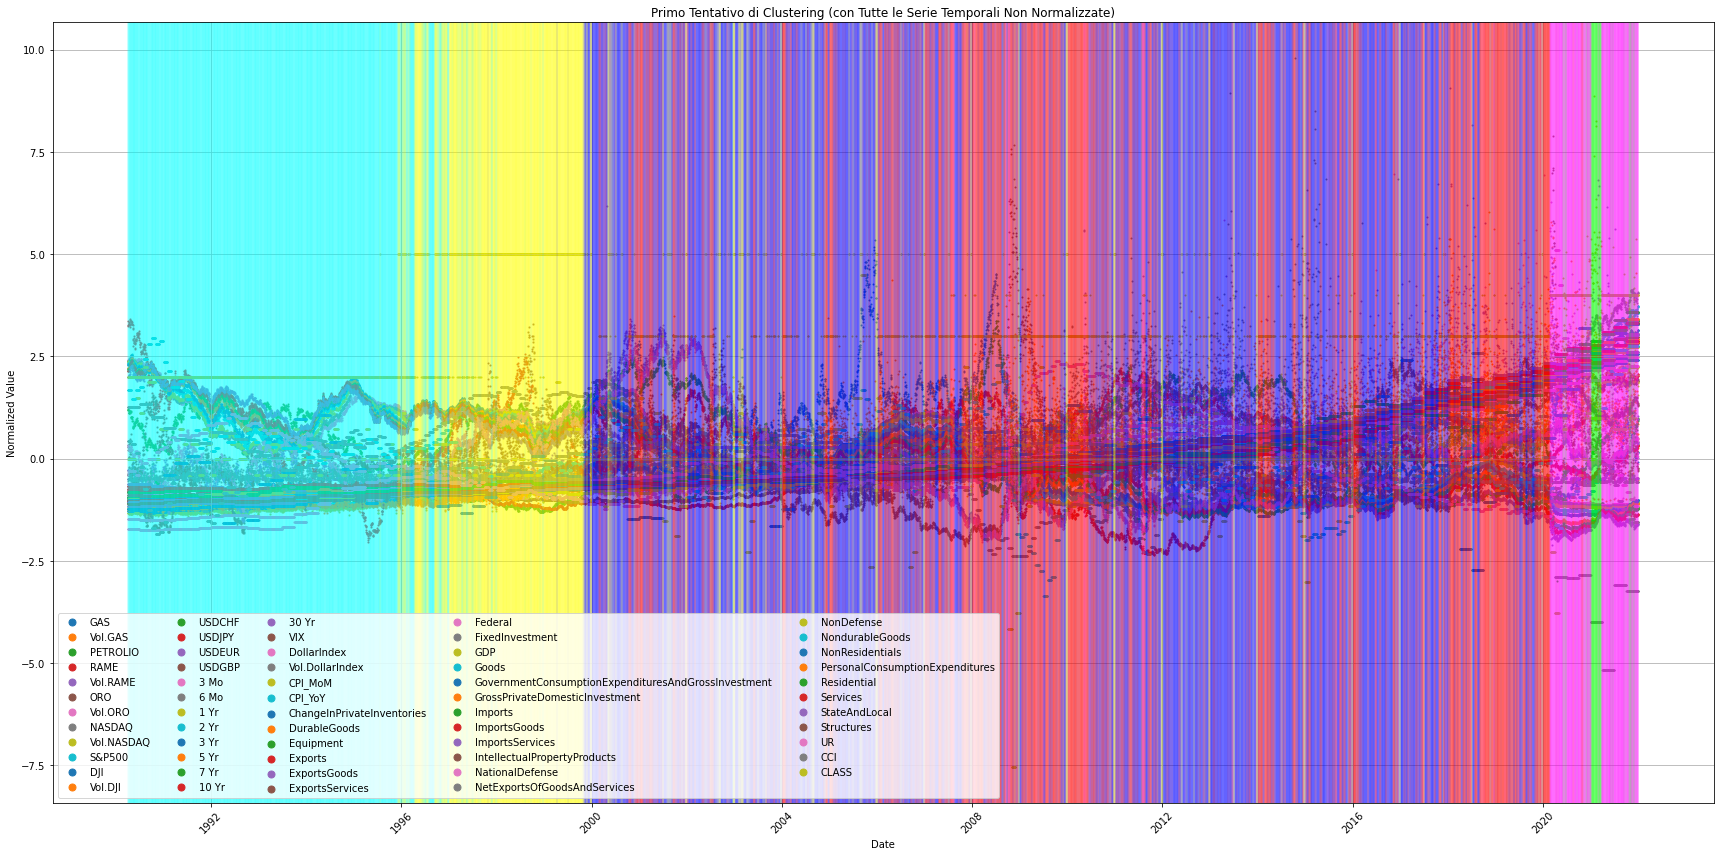

In [6]:
#DECIDO IL NUMERO DI CLUSTERING CON IL METODO DEL GOMITO
n_clusters = 6

kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
df['CLASS'] = kmeans.fit_predict(X)

# Creiamo un grafico vuoto   
plt.figure(figsize=(24, 12))

# Iteriamo sulle colonne del DataFrame normalizzato
for col in df.columns:
    if(col != 'Date'):  # Escludiamo la colonna 'Date'
        plt.scatter(df['Date'], df[col], label=col, s=1)

highlight_cluster0 = df[df['CLASS'] == 0]['Date']
highlight_cluster0 = pd.to_datetime(highlight_cluster0, format='%Y/%m/%d')
for date in highlight_cluster0:
    plt.axvline(date, color=(0, 0, 1, 0.5), alpha=0.1)
    
highlight_cluster1 = df[df['CLASS'] == 1]['Date']
highlight_cluster1 = pd.to_datetime(highlight_cluster1, format='%Y/%m/%d')
for date in highlight_cluster1:
    plt.axvline(date, color=(0, 1, 0, 0.5), alpha=0.1)
    
highlight_cluster2 = df[df['CLASS'] == 2]['Date']
highlight_cluster2 = pd.to_datetime(highlight_cluster2, format='%Y/%m/%d')
for date in highlight_cluster2:
    plt.axvline(date, color=(0, 1, 1, 0.5), alpha=0.1)
    
highlight_cluster3 = df[df['CLASS'] == 3]['Date']
highlight_cluster3 = pd.to_datetime(highlight_cluster3, format='%Y/%m/%d')
for date in highlight_cluster3:
    plt.axvline(date, color=(1, 0, 0, 0.5), alpha=0.1)
    
highlight_cluster4 = df[df['CLASS'] == 4]['Date']
highlight_cluster4 = pd.to_datetime(highlight_cluster4, format='%Y/%m/%d')
for date in highlight_cluster4:
    plt.axvline(date, color=(1, 0, 1, 0.5), alpha=0.1)
    
highlight_cluster5 = df[df['CLASS'] == 5]['Date']
highlight_cluster5 = pd.to_datetime(highlight_cluster5, format='%Y/%m/%d')
for date in highlight_cluster5:
    plt.axvline(date, color=(1, 1, 0, 0.5), alpha=0.1)
    
#highlight_cluster6 = df[df['CLASS'] == 6]['Date']
#highlight_cluster6 = pd.to_datetime(highlight_cluster6, format='%Y/%m/%d')
#for date in highlight_cluster6:
#    plt.axvline(date, color=(1, 1, 1, 0.5), alpha=0.1)
    
#highlight_cluster7 = df[df['CLASS'] == 7]['Date']
#highlight_cluster7 = pd.to_datetime(highlight_cluster7, format='%Y/%m/%d')
#for date in highlight_cluster7:
#    plt.axvline(date, color=(0.5, 0.5, 1, 0.5), alpha=0.1)
    
#highlight_cluster8 = df[df['CLASS'] == 8]['Date']
#highlight_cluster8 = pd.to_datetime(highlight_cluster8, format='%Y/%m/%d')
#for date in highlight_cluster8:
#    plt.axvline(date, color=(0.5, 1, 0.5, 0.5), alpha=0.1)
    
#highlight_cluster9 = df[df['CLASS'] == 9]['Date']
#highlight_cluster9 = pd.to_datetime(highlight_cluster9, format='%Y/%m/%d')
#for date in highlight_cluster9:
#    plt.axvline(date, color=(0.5, 1, 1, 0.5), alpha=0.1)
    
#highlight_cluster10 = df[df['CLASS'] == 10]['Date']
#highlight_cluster10 = pd.to_datetime(highlight_cluster10, format='%Y/%m/%d')
#for date in highlight_cluster10:
#    plt.axvline(date, color=(1, 0.5, 0.5, 0.5), alpha=0.1)
        
# Aggiungiamo etichette e titolo
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('Primo Tentativo di Clustering (con Tutte le Serie Temporali Non Normalizzate)')

# Aggiungiamo la legenda
plt.legend(loc='lower left', fontsize=10., markerscale=7, ncol=5)

# Ruotiamo le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Mostriamo il grafico
plt.tight_layout()
plt.grid(True) 

plt.show()

## Secondo Tentativo di Clustering (con Tutte le Serie Temporali Normalizzate)

In [7]:
#RISPETTO A PRIMA CAMBIA CHE STO PRENDENDO IL DATASET NORMALIZZATO
X = df.drop('Date', axis=1)

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\andre\AppData\Roaming\Python\Py

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



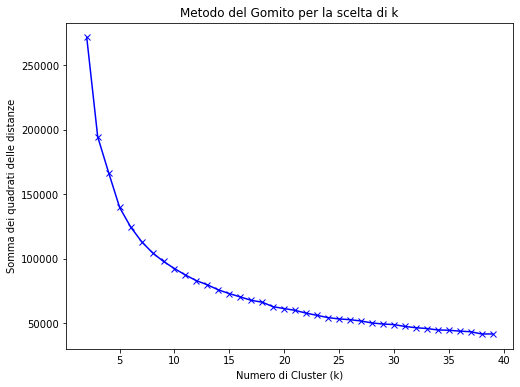

In [8]:
#METODO DEL GOMITO
sum_of_squared_distances = []
K = range(2, 40)
for k in K:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X)
    sum_of_squared_distances.append(kmeans.inertia_)
    
# Plot del grafico "gomito"
plt.figure(figsize=(8, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('Somma dei quadrati delle distanze')
plt.title('Metodo del Gomito per la scelta di k')
plt.show()

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



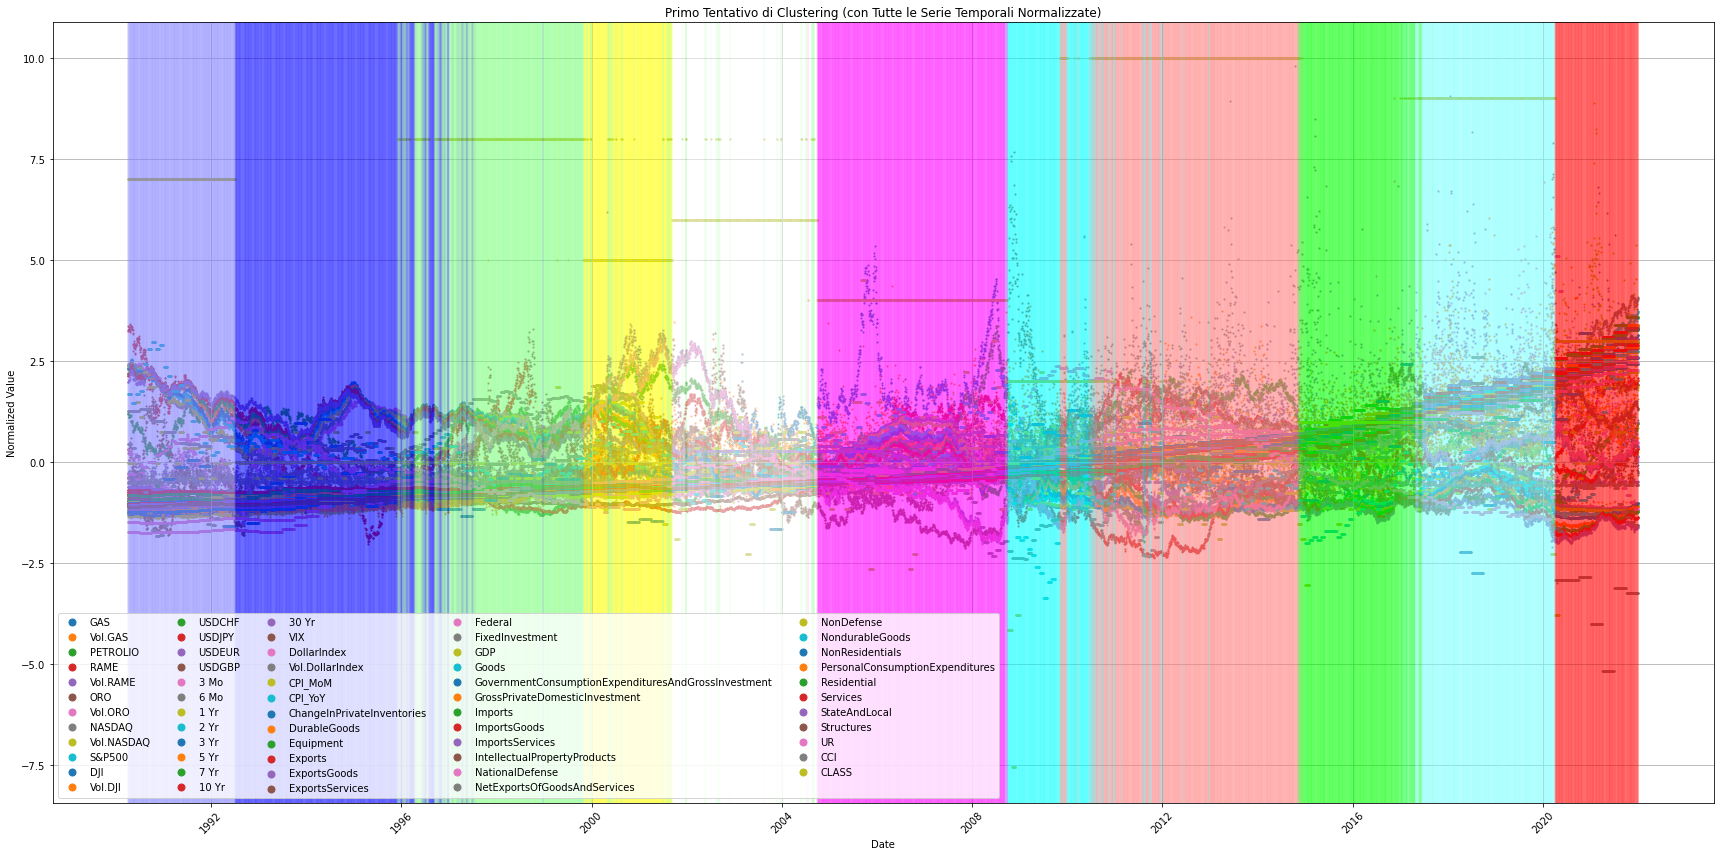

In [9]:
#DECIDO IL NUMERO DI CLUSTERING CON IL METODO DEL GOMITO
n_clusters = 11

kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
df['CLASS'] = kmeans.fit_predict(X)

# Creiamo un grafico vuoto   
plt.figure(figsize=(24, 12))

# Iteriamo sulle colonne del DataFrame normalizzato
for col in df.columns:
    if(col != 'Date'):  # Escludiamo la colonna 'Date'
        plt.scatter(df['Date'], df[col], label=col, s=1)

highlight_cluster0 = df[df['CLASS'] == 0]['Date']
highlight_cluster0 = pd.to_datetime(highlight_cluster0, format='%Y/%m/%d')
for date in highlight_cluster0:
    plt.axvline(date, color=(0, 0, 1, 0.5), alpha=0.1)
    
highlight_cluster1 = df[df['CLASS'] == 1]['Date']
highlight_cluster1 = pd.to_datetime(highlight_cluster1, format='%Y/%m/%d')
for date in highlight_cluster1:
    plt.axvline(date, color=(0, 1, 0, 0.5), alpha=0.1)
    
highlight_cluster2 = df[df['CLASS'] == 2]['Date']
highlight_cluster2 = pd.to_datetime(highlight_cluster2, format='%Y/%m/%d')
for date in highlight_cluster2:
    plt.axvline(date, color=(0, 1, 1, 0.5), alpha=0.1)
    
highlight_cluster3 = df[df['CLASS'] == 3]['Date']
highlight_cluster3 = pd.to_datetime(highlight_cluster3, format='%Y/%m/%d')
for date in highlight_cluster3:
    plt.axvline(date, color=(1, 0, 0, 0.5), alpha=0.1)
    
highlight_cluster4 = df[df['CLASS'] == 4]['Date']
highlight_cluster4 = pd.to_datetime(highlight_cluster4, format='%Y/%m/%d')
for date in highlight_cluster4:
    plt.axvline(date, color=(1, 0, 1, 0.5), alpha=0.1)
    
highlight_cluster5 = df[df['CLASS'] == 5]['Date']
highlight_cluster5 = pd.to_datetime(highlight_cluster5, format='%Y/%m/%d')
for date in highlight_cluster5:
    plt.axvline(date, color=(1, 1, 0, 0.5), alpha=0.1)
    
highlight_cluster6 = df[df['CLASS'] == 6]['Date']
highlight_cluster6 = pd.to_datetime(highlight_cluster6, format='%Y/%m/%d')
for date in highlight_cluster6:
    plt.axvline(date, color=(1, 1, 1, 0.5), alpha=0.1)
    
highlight_cluster7 = df[df['CLASS'] == 7]['Date']
highlight_cluster7 = pd.to_datetime(highlight_cluster7, format='%Y/%m/%d')
for date in highlight_cluster7:
    plt.axvline(date, color=(0.5, 0.5, 1, 0.5), alpha=0.1)
    
highlight_cluster8 = df[df['CLASS'] == 8]['Date']
highlight_cluster8 = pd.to_datetime(highlight_cluster8, format='%Y/%m/%d')
for date in highlight_cluster8:
    plt.axvline(date, color=(0.5, 1, 0.5, 0.5), alpha=0.1)
    
highlight_cluster9 = df[df['CLASS'] == 9]['Date']
highlight_cluster9 = pd.to_datetime(highlight_cluster9, format='%Y/%m/%d')
for date in highlight_cluster9:
    plt.axvline(date, color=(0.5, 1, 1, 0.5), alpha=0.1)
    
highlight_cluster10 = df[df['CLASS'] == 10]['Date']
highlight_cluster10 = pd.to_datetime(highlight_cluster10, format='%Y/%m/%d')
for date in highlight_cluster10:
    plt.axvline(date, color=(1, 0.5, 0.5, 0.5), alpha=0.1)
        
# Aggiungiamo etichette e titolo
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('Primo Tentativo di Clustering (con Tutte le Serie Temporali Normalizzate)')

# Aggiungiamo la legenda
plt.legend(loc='lower left', fontsize=10., markerscale=7, ncol=5)

# Ruotiamo le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Mostriamo il grafico
plt.tight_layout()
plt.grid(True) 

plt.show()

## Terzo Tentativo di Clustering (Selezione delle Serie Temporali più Importanti sul Dataset Non Normalizzato)

In [10]:
# COSTRUISCO I CLUSTERS SUL DATASET NON NORMALIZZATO

X = df_NonNormalizzato[['CPI_MoM', 'CPI_YoY', 
        'GDP', 'Imports', 'Exports', 
        'UR', 'CCI', 
        'S&P500', 'VIX', 
        'ORO', 'PETROLIO', 
        '2 Yr', '10 Yr', 
        'DollarIndex']]

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\andre\AppData\Roaming\Python\Py

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



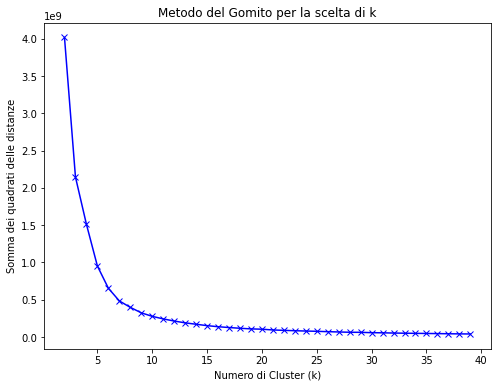

In [11]:
#METODO DEL GOMITO
sum_of_squared_distances = []
K = range(2, 40)
for k in K:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X)
    sum_of_squared_distances.append(kmeans.inertia_)
    
# Plot del grafico "gomito"
plt.figure(figsize=(8, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('Somma dei quadrati delle distanze')
plt.title('Metodo del Gomito per la scelta di k')
plt.show()

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



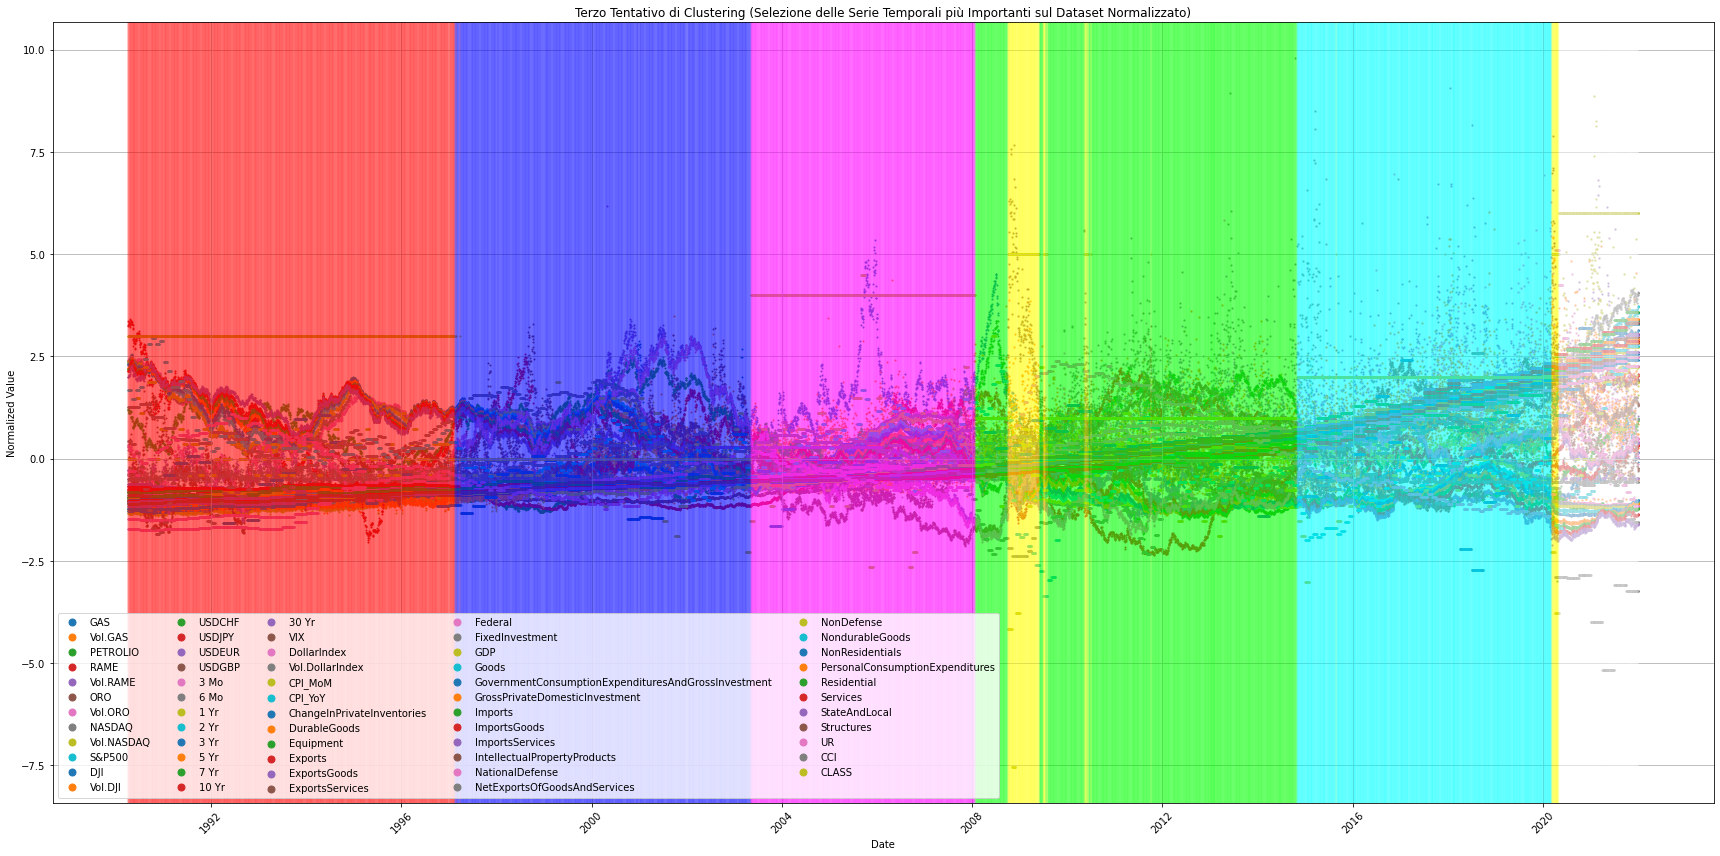

Ci sono 34 cambi di regime con 7 clusters


In [30]:
#DECIDO IL NUMERO DI CLUSTERING CON IL METODO DEL GOMITO
n_clusters = 7

kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
df['CLASS'] = kmeans.fit_predict(X)

# Creiamo un grafico vuoto   
plt.figure(figsize=(24, 12))

# Iteriamo sulle colonne del DataFrame normalizzato
for col in df.columns:
    if(col != 'Date'):  # Escludiamo la colonna 'Date'
        plt.scatter(df['Date'], df[col], label=col, s=1)

highlight_cluster0 = df[df['CLASS'] == 0]['Date']
highlight_cluster0 = pd.to_datetime(highlight_cluster0, format='%Y/%m/%d')
for date in highlight_cluster0:
    plt.axvline(date, color=(0, 0, 1, 0.5), alpha=0.1)
    
highlight_cluster1 = df[df['CLASS'] == 1]['Date']
highlight_cluster1 = pd.to_datetime(highlight_cluster1, format='%Y/%m/%d')
for date in highlight_cluster1:
    plt.axvline(date, color=(0, 1, 0, 0.5), alpha=0.1)
    
highlight_cluster2 = df[df['CLASS'] == 2]['Date']
highlight_cluster2 = pd.to_datetime(highlight_cluster2, format='%Y/%m/%d')
for date in highlight_cluster2:
    plt.axvline(date, color=(0, 1, 1, 0.5), alpha=0.1)
    
highlight_cluster3 = df[df['CLASS'] == 3]['Date']
highlight_cluster3 = pd.to_datetime(highlight_cluster3, format='%Y/%m/%d')
for date in highlight_cluster3:
    plt.axvline(date, color=(1, 0, 0, 0.5), alpha=0.1)
    
highlight_cluster4 = df[df['CLASS'] == 4]['Date']
highlight_cluster4 = pd.to_datetime(highlight_cluster4, format='%Y/%m/%d')
for date in highlight_cluster4:
    plt.axvline(date, color=(1, 0, 1, 0.5), alpha=0.1)
    
highlight_cluster5 = df[df['CLASS'] == 5]['Date']
highlight_cluster5 = pd.to_datetime(highlight_cluster5, format='%Y/%m/%d')
for date in highlight_cluster5:
    plt.axvline(date, color=(1, 1, 0, 0.5), alpha=0.1)
    
highlight_cluster6 = df[df['CLASS'] == 6]['Date']
highlight_cluster6 = pd.to_datetime(highlight_cluster6, format='%Y/%m/%d')
for date in highlight_cluster6:
    plt.axvline(date, color=(1, 1, 1, 0.5), alpha=0.1)
    
#highlight_cluster7 = df[df['CLASS'] == 7]['Date']
#highlight_cluster7 = pd.to_datetime(highlight_cluster7, format='%Y/%m/%d')
#for date in highlight_cluster7:
#    plt.axvline(date, color=(0.5, 0.5, 1, 0.5), alpha=0.1)
    
#highlight_cluster8 = df[df['CLASS'] == 8]['Date']
#highlight_cluster8 = pd.to_datetime(highlight_cluster8, format='%Y/%m/%d')
#for date in highlight_cluster8:
#    plt.axvline(date, color=(0.5, 1, 0.5, 0.5), alpha=0.1)
    
#highlight_cluster9 = df[df['CLASS'] == 9]['Date']
#highlight_cluster9 = pd.to_datetime(highlight_cluster9, format='%Y/%m/%d')
#for date in highlight_cluster9:
#    plt.axvline(date, color=(0.5, 1, 1, 0.5), alpha=0.1)
    
#highlight_cluster10 = df[df['CLASS'] == 10]['Date']
#highlight_cluster10 = pd.to_datetime(highlight_cluster10, format='%Y/%m/%d')
#for date in highlight_cluster10:
#    plt.axvline(date, color=(1, 0.5, 0.5, 0.5), alpha=0.1)
        
# Aggiungiamo etichette e titolo
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('Terzo Tentativo di Clustering (Selezione delle Serie Temporali più Importanti sul Dataset Normalizzato)')

# Aggiungiamo la legenda
plt.legend(loc='lower left', fontsize=10., markerscale=7, ncol=5)

# Ruotiamo le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Mostriamo il grafico
plt.tight_layout()
plt.grid(True) 

plt.show()

conta_cambi = 0
for label in df['CLASS'].diff()[1:]:
    if(type(label) != float):
        continue
    if(int(label) != 0):
        conta_cambi += 1
print("Ci sono", conta_cambi, "cambi di regime con", n_clusters, "clusters")

## Quarto Tentativo di Clustering (Selezione delle Serie Temporali più Importanti sul Dataset Normalizzato)

In [13]:
# COSTRUISCO I CLUSTERS SUL DATASET NORMALIZZATO

X = df[['CPI_MoM', 'CPI_YoY', 
        'GDP', 'Imports', 'Exports', 
        'UR', 'CCI', 
        'S&P500', 'VIX', 
        'ORO', 'PETROLIO', 
        '2 Yr', '10 Yr', 
        'DollarIndex']]

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\andre\AppData\Roaming\Python\Py

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



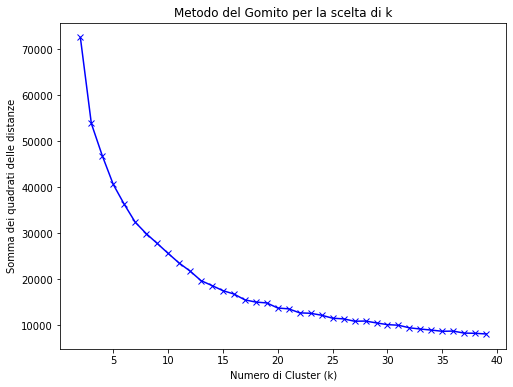

In [14]:
#METODO DEL GOMITO
sum_of_squared_distances = []
K = range(2, 40)
for k in K:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X)
    sum_of_squared_distances.append(kmeans.inertia_)
    
# Plot del grafico "gomito"
plt.figure(figsize=(8, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('Somma dei quadrati delle distanze')
plt.title('Metodo del Gomito per la scelta di k')
plt.show()

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



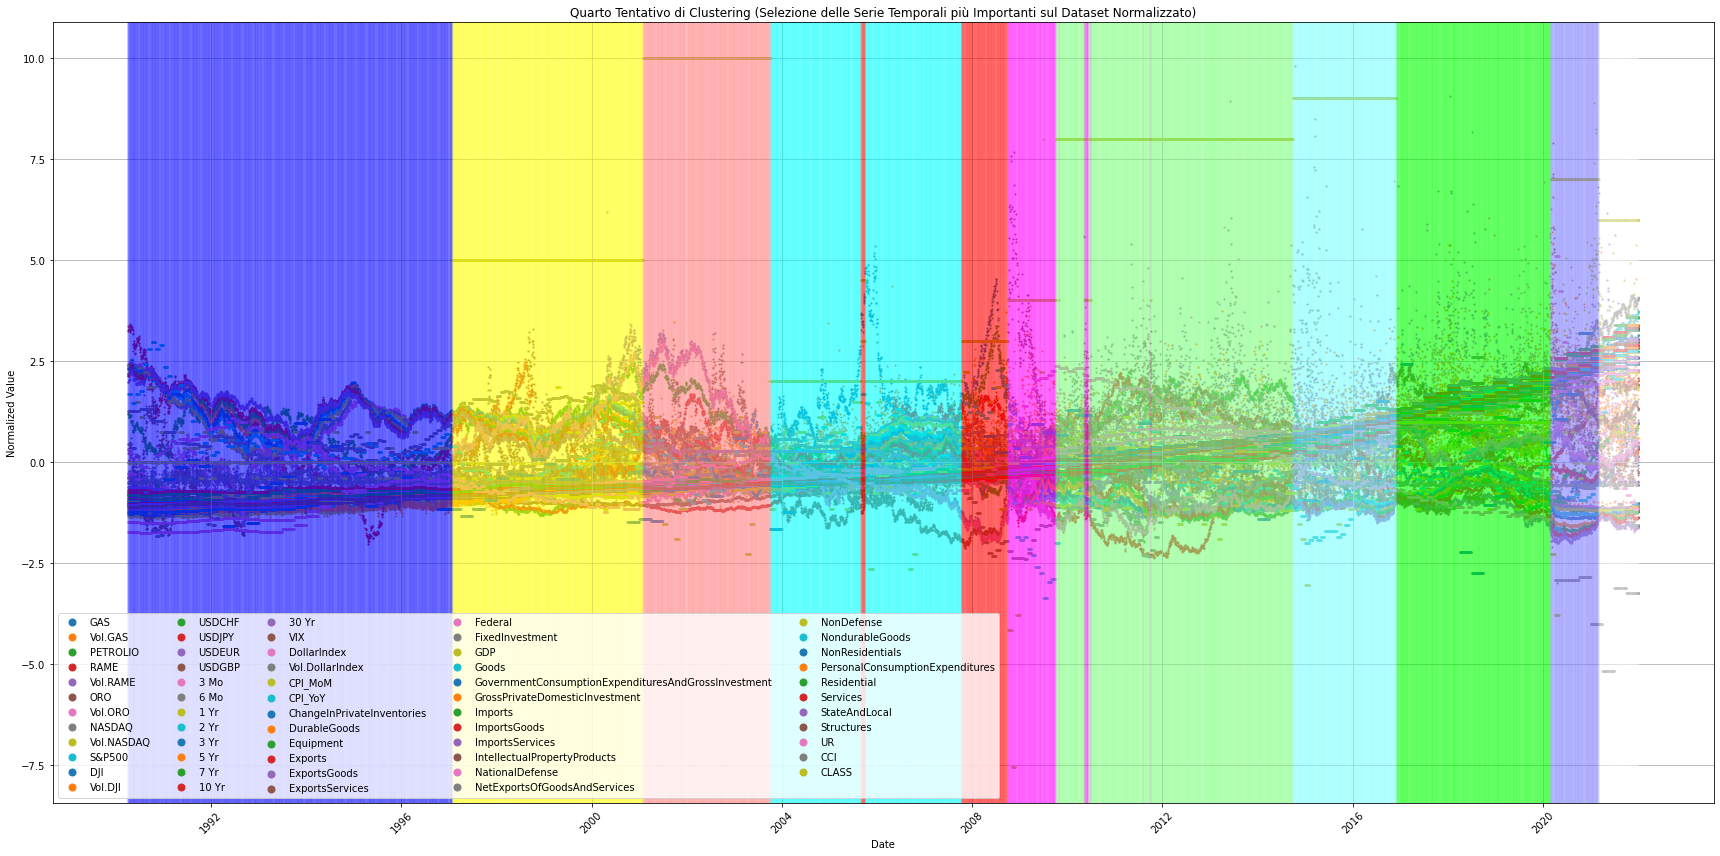

Ci sono 38 cambi di regime con 11 clusters


In [29]:
#DECIDO IL NUMERO DI CLUSTERING CON IL METODO DEL GOMITO
n_clusters = 11

kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
df['CLASS'] = kmeans.fit_predict(X)

# Creiamo un grafico vuoto   
plt.figure(figsize=(24, 12))

# Iteriamo sulle colonne del DataFrame normalizzato
for col in df.columns:
    if(col != 'Date'):  # Escludiamo la colonna 'Date'
        plt.scatter(df['Date'], df[col], label=col, s=1)

highlight_cluster0 = df[df['CLASS'] == 0]['Date']
highlight_cluster0 = pd.to_datetime(highlight_cluster0, format='%Y/%m/%d')
for date in highlight_cluster0:
    plt.axvline(date, color=(0, 0, 1, 0.5), alpha=0.1)
    
highlight_cluster1 = df[df['CLASS'] == 1]['Date']
highlight_cluster1 = pd.to_datetime(highlight_cluster1, format='%Y/%m/%d')
for date in highlight_cluster1:
    plt.axvline(date, color=(0, 1, 0, 0.5), alpha=0.1)
    
highlight_cluster2 = df[df['CLASS'] == 2]['Date']
highlight_cluster2 = pd.to_datetime(highlight_cluster2, format='%Y/%m/%d')
for date in highlight_cluster2:
    plt.axvline(date, color=(0, 1, 1, 0.5), alpha=0.1)
    
highlight_cluster3 = df[df['CLASS'] == 3]['Date']
highlight_cluster3 = pd.to_datetime(highlight_cluster3, format='%Y/%m/%d')
for date in highlight_cluster3:
    plt.axvline(date, color=(1, 0, 0, 0.5), alpha=0.1)
    
highlight_cluster4 = df[df['CLASS'] == 4]['Date']
highlight_cluster4 = pd.to_datetime(highlight_cluster4, format='%Y/%m/%d')
for date in highlight_cluster4:
    plt.axvline(date, color=(1, 0, 1, 0.5), alpha=0.1)
    
highlight_cluster5 = df[df['CLASS'] == 5]['Date']
highlight_cluster5 = pd.to_datetime(highlight_cluster5, format='%Y/%m/%d')
for date in highlight_cluster5:
    plt.axvline(date, color=(1, 1, 0, 0.5), alpha=0.1)
    
highlight_cluster6 = df[df['CLASS'] == 6]['Date']
highlight_cluster6 = pd.to_datetime(highlight_cluster6, format='%Y/%m/%d')
for date in highlight_cluster6:
    plt.axvline(date, color=(1, 1, 1, 0.5), alpha=0.1)
    
highlight_cluster7 = df[df['CLASS'] == 7]['Date']
highlight_cluster7 = pd.to_datetime(highlight_cluster7, format='%Y/%m/%d')
for date in highlight_cluster7:
    plt.axvline(date, color=(0.5, 0.5, 1, 0.5), alpha=0.1)
    
highlight_cluster8 = df[df['CLASS'] == 8]['Date']
highlight_cluster8 = pd.to_datetime(highlight_cluster8, format='%Y/%m/%d')
for date in highlight_cluster8:
    plt.axvline(date, color=(0.5, 1, 0.5, 0.5), alpha=0.1)
    
highlight_cluster9 = df[df['CLASS'] == 9]['Date']
highlight_cluster9 = pd.to_datetime(highlight_cluster9, format='%Y/%m/%d')
for date in highlight_cluster9:
    plt.axvline(date, color=(0.5, 1, 1, 0.5), alpha=0.1)
    
highlight_cluster10 = df[df['CLASS'] == 10]['Date']
highlight_cluster10 = pd.to_datetime(highlight_cluster10, format='%Y/%m/%d')
for date in highlight_cluster10:
    plt.axvline(date, color=(1, 0.5, 0.5, 0.5), alpha=0.1)
        
# Aggiungiamo etichette e titolo
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('Quarto Tentativo di Clustering (Selezione delle Serie Temporali più Importanti sul Dataset Normalizzato)')

# Aggiungiamo la legenda
plt.legend(loc='lower left', fontsize=10., markerscale=7, ncol=5)

# Ruotiamo le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Mostriamo il grafico
plt.tight_layout()
plt.grid(True) 

plt.show()

conta_cambi = 0
for label in df['CLASS'].diff()[1:]:
    if(type(label) != float):
        continue
    if(int(label) != 0):
        conta_cambi += 1
print("Ci sono", conta_cambi, "cambi di regime con", n_clusters, "clusters")

## Quinto Tentativo: Stesso Setting di Prima ma con k = 20. (Voglio vedere se qualche cluster si ripete...)

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



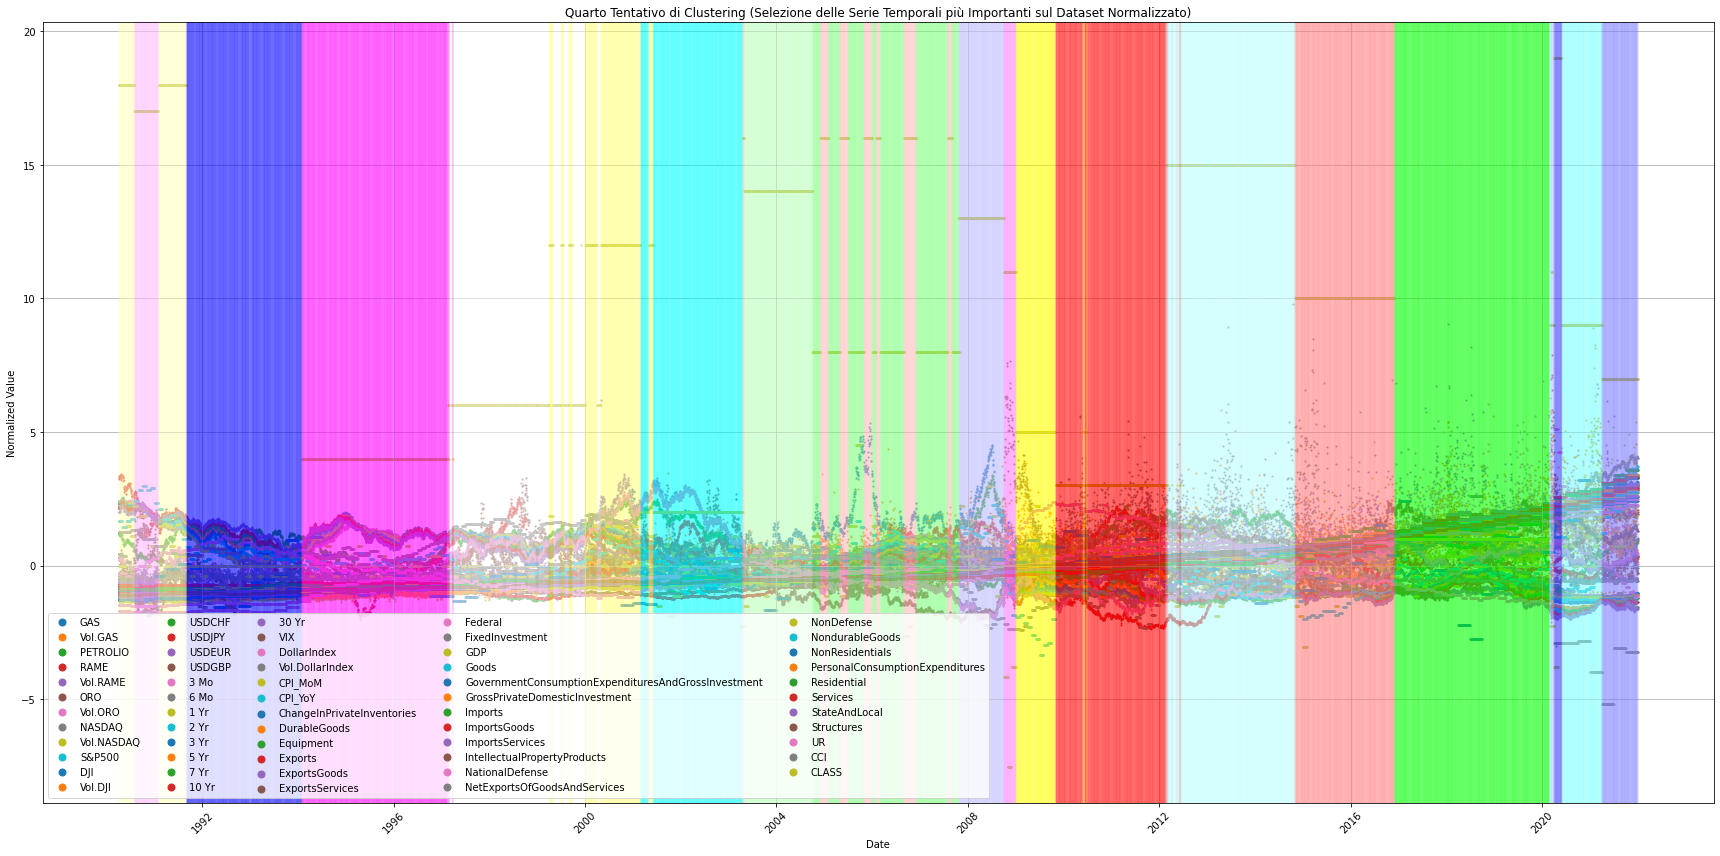

Ci sono 87 cambi di regime con 20 clusters


In [28]:
#DECIDO IL NUMERO DI CLUSTERING CON IL METODO DEL GOMITO
n_clusters = 20

kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
df['CLASS'] = kmeans.fit_predict(X)

# Creiamo un grafico vuoto   
plt.figure(figsize=(24, 12))

# Iteriamo sulle colonne del DataFrame normalizzato
for col in df.columns:
    if(col != 'Date'):  # Escludiamo la colonna 'Date'
        plt.scatter(df['Date'], df[col], label=col, s=1)

highlight_cluster0 = df[df['CLASS'] == 0]['Date']
highlight_cluster0 = pd.to_datetime(highlight_cluster0, format='%Y/%m/%d')
for date in highlight_cluster0:
    plt.axvline(date, color=(0, 0, 1, 0.5), alpha=0.1)
    
highlight_cluster1 = df[df['CLASS'] == 1]['Date']
highlight_cluster1 = pd.to_datetime(highlight_cluster1, format='%Y/%m/%d')
for date in highlight_cluster1:
    plt.axvline(date, color=(0, 1, 0, 0.5), alpha=0.1)
    
highlight_cluster2 = df[df['CLASS'] == 2]['Date']
highlight_cluster2 = pd.to_datetime(highlight_cluster2, format='%Y/%m/%d')
for date in highlight_cluster2:
    plt.axvline(date, color=(0, 1, 1, 0.5), alpha=0.1)
    
highlight_cluster3 = df[df['CLASS'] == 3]['Date']
highlight_cluster3 = pd.to_datetime(highlight_cluster3, format='%Y/%m/%d')
for date in highlight_cluster3:
    plt.axvline(date, color=(1, 0, 0, 0.5), alpha=0.1)
    
highlight_cluster4 = df[df['CLASS'] == 4]['Date']
highlight_cluster4 = pd.to_datetime(highlight_cluster4, format='%Y/%m/%d')
for date in highlight_cluster4:
    plt.axvline(date, color=(1, 0, 1, 0.5), alpha=0.1)
    
highlight_cluster5 = df[df['CLASS'] == 5]['Date']
highlight_cluster5 = pd.to_datetime(highlight_cluster5, format='%Y/%m/%d')
for date in highlight_cluster5:
    plt.axvline(date, color=(1, 1, 0, 0.5), alpha=0.1)
    
highlight_cluster6 = df[df['CLASS'] == 6]['Date']
highlight_cluster6 = pd.to_datetime(highlight_cluster6, format='%Y/%m/%d')
for date in highlight_cluster6:
    plt.axvline(date, color=(1, 1, 1, 0.5), alpha=0.1)
    
highlight_cluster7 = df[df['CLASS'] == 7]['Date']
highlight_cluster7 = pd.to_datetime(highlight_cluster7, format='%Y/%m/%d')
for date in highlight_cluster7:
    plt.axvline(date, color=(0.5, 0.5, 1, 0.5), alpha=0.1)
    
highlight_cluster8 = df[df['CLASS'] == 8]['Date']
highlight_cluster8 = pd.to_datetime(highlight_cluster8, format='%Y/%m/%d')
for date in highlight_cluster8:
    plt.axvline(date, color=(0.5, 1, 0.5, 0.5), alpha=0.1)
    
highlight_cluster9 = df[df['CLASS'] == 9]['Date']
highlight_cluster9 = pd.to_datetime(highlight_cluster9, format='%Y/%m/%d')
for date in highlight_cluster9:
    plt.axvline(date, color=(0.5, 1, 1, 0.5), alpha=0.1)
    
highlight_cluster10 = df[df['CLASS'] == 10]['Date']
highlight_cluster10 = pd.to_datetime(highlight_cluster10, format='%Y/%m/%d')
for date in highlight_cluster10:
    plt.axvline(date, color=(1, 0.5, 0.5, 0.5), alpha=0.1)
    
highlight_cluster11 = df[df['CLASS'] == 11]['Date']
highlight_cluster11 = pd.to_datetime(highlight_cluster11, format='%Y/%m/%d')
for date in highlight_cluster11:
    plt.axvline(date, color=(1, 0.5, 1, 0.5), alpha=0.1)
    
highlight_cluster12 = df[df['CLASS'] == 12]['Date']
highlight_cluster12 = pd.to_datetime(highlight_cluster12, format='%Y/%m/%d')
for date in highlight_cluster12:
    plt.axvline(date, color=(1, 1, 0.5, 0.5), alpha=0.1)
    
highlight_cluster13 = df[df['CLASS'] == 13]['Date']
highlight_cluster13 = pd.to_datetime(highlight_cluster13, format='%Y/%m/%d')
for date in highlight_cluster13:
    plt.axvline(date, color=(0.75, 0.75, 1, 0.5), alpha=0.1)
    
highlight_cluster14 = df[df['CLASS'] == 14]['Date']
highlight_cluster14 = pd.to_datetime(highlight_cluster14, format='%Y/%m/%d')
for date in highlight_cluster14:
    plt.axvline(date, color=(0.75, 1, 0.75, 0.5), alpha=0.1)
    
highlight_cluster15 = df[df['CLASS'] == 15]['Date']
highlight_cluster15 = pd.to_datetime(highlight_cluster15, format='%Y/%m/%d')
for date in highlight_cluster15:
    plt.axvline(date, color=(0.75, 1, 1, 0.5), alpha=0.1)
    
highlight_cluster16 = df[df['CLASS'] == 16]['Date']
highlight_cluster16 = pd.to_datetime(highlight_cluster16, format='%Y/%m/%d')
for date in highlight_cluster16:
    plt.axvline(date, color=(1, 0.75, 0.75, 0.5), alpha=0.1)
    
highlight_cluster17 = df[df['CLASS'] == 17]['Date']
highlight_cluster17 = pd.to_datetime(highlight_cluster17, format='%Y/%m/%d')
for date in highlight_cluster17:
    plt.axvline(date, color=(1, 0.75, 1, 0.5), alpha=0.1)
    
highlight_cluster18 = df[df['CLASS'] == 18]['Date']
highlight_cluster18 = pd.to_datetime(highlight_cluster18, format='%Y/%m/%d')
for date in highlight_cluster18:
    plt.axvline(date, color=(1, 1, 0.75, 0.5), alpha=0.1)
    
highlight_cluster19 = df[df['CLASS'] == 19]['Date']
highlight_cluster19 = pd.to_datetime(highlight_cluster19, format='%Y/%m/%d')
for date in highlight_cluster19:
    plt.axvline(date, color=(0.25, 0.25, 1, 0.5), alpha=0.1)
        
# Aggiungiamo etichette e titolo
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('Quarto Tentativo di Clustering (Selezione delle Serie Temporali più Importanti sul Dataset Normalizzato)')

# Aggiungiamo la legenda
plt.legend(loc='lower left', fontsize=10., markerscale=7, ncol=5)

# Ruotiamo le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Mostriamo il grafico
plt.tight_layout()
plt.grid(True) 

plt.show()

conta_cambi = 0
for label in df['CLASS'].diff()[1:]:
    if(type(label) != float):
        continue
    if(int(label) != 0):
        conta_cambi += 1
print("Ci sono", conta_cambi, "cambi di regime con", n_clusters, "clusters")

C:\Users\andre\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



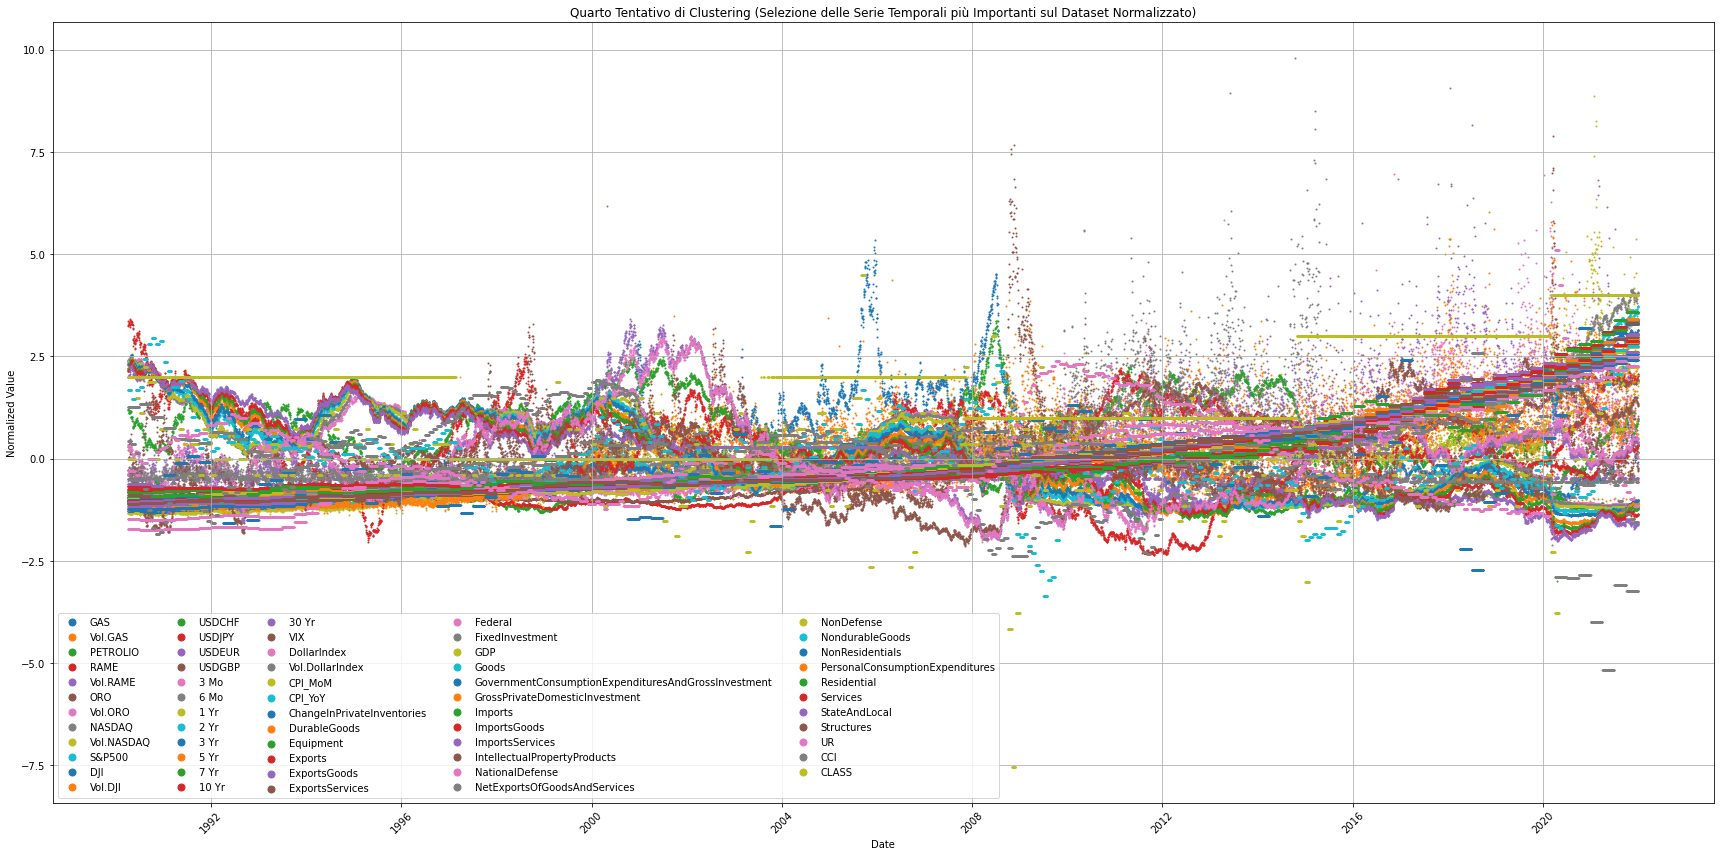

Ci sono 35 cambi di regime con 5 clusters


In [33]:
#DECIDO IL NUMERO DI CLUSTERING CON IL METODO DEL GOMITO
n_clusters = 5

kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
df['CLASS'] = kmeans.fit_predict(X)

# Creiamo un grafico vuoto   
plt.figure(figsize=(24, 12))

# Iteriamo sulle colonne del DataFrame normalizzato
for col in df.columns:
    if(col != 'Date'):  # Escludiamo la colonna 'Date'
        plt.scatter(df['Date'], df[col], label=col, s=1)
        
# Aggiungiamo etichette e titolo
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('Quarto Tentativo di Clustering (Selezione delle Serie Temporali più Importanti sul Dataset Normalizzato)')

# Aggiungiamo la legenda
plt.legend(loc='lower left', fontsize=10., markerscale=7, ncol=5)

# Ruotiamo le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Mostriamo il grafico
plt.tight_layout()
plt.grid(True) 

plt.show()

conta_cambi = 0
for label in df['CLASS'].diff()[1:]:
    if(type(label) != float):
        continue
    if(int(label) != 0):
        conta_cambi += 1
print("Ci sono", conta_cambi, "cambi di regime con", n_clusters, "clusters")